In [1]:
import pandas as pd
import numpy as np

# Generate dummy sales data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=30, freq="D")

products = ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Tea']
prices = {'Espresso': 2.5, 'Latte': 3.5, 'Cappuccino': 3.0, 'Mocha': 4.0, 'Tea': 2.0}

data = []

for date in dates:
    for _ in range(np.random.randint(50, 100)):
        product = np.random.choice(products)
        time = f"{np.random.randint(7, 19)}:00"
        data.append({
            'Date': date,
            'Time': time,
            'Product': product,
            'Price': prices[product]
        })

df = pd.DataFrame(data)


In [2]:
print(df.head())
print(df['Product'].value_counts())
print(df.describe())


        Date   Time     Product  Price
0 2023-01-01  17:00       Mocha    4.0
1 2023-01-01  11:00         Tea    2.0
2 2023-01-01   9:00       Latte    3.5
3 2023-01-01  17:00  Cappuccino    3.0
4 2023-01-01  10:00         Tea    2.0
Product
Espresso      491
Latte         478
Tea           476
Mocha         472
Cappuccino    467
Name: count, dtype: int64
                                Date        Price
count                           2384  2384.000000
mean   2023-01-14 23:05:38.255033600     2.995596
min              2023-01-01 00:00:00     2.000000
25%              2023-01-08 00:00:00     2.500000
50%              2023-01-15 00:00:00     3.000000
75%              2023-01-22 00:00:00     3.500000
max              2023-01-30 00:00:00     4.000000
std                              NaN     0.706722


In [2]:
df['Hour'] = df['Time'].str.extract(r'(\d+):')[0].astype(int)
df['Day'] = df['Date'].dt.day_name()

In [3]:
df.groupby('Product')['Price'].sum().sort_values(ascending=False)

Product
Mocha         1888.0
Latte         1673.0
Cappuccino    1401.0
Espresso      1227.5
Tea            952.0
Name: Price, dtype: float64

<Axes: title={'center': 'Revenue by Day'}, xlabel='Day'>

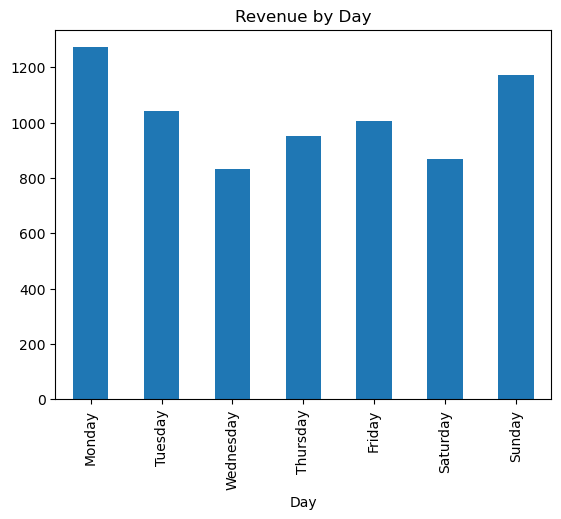

In [4]:
df.groupby('Day')['Price'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', title="Revenue by Day")

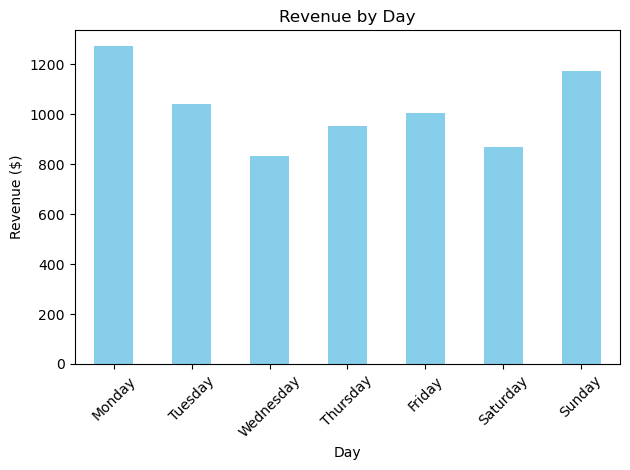

In [5]:
import matplotlib.pyplot as plt

# Ensure 'Day' column exists and is valid
if 'Day' not in df.columns:
    df['Day'] = df['Date'].dt.day_name()

# Define the correct order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group, sum, and reindex safely
revenue_by_day = (
    df.groupby('Day', observed=True)['Price']
    .sum()
    .reindex(days_order)
    .fillna(0)  # Fill missing days with 0 revenue
)

# Plot with labels and tight layout
ax = revenue_by_day.plot(kind='bar', title="Revenue by Day", ylabel="Revenue ($)", xlabel="Day", color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()